# Before Running the Script Please Make Sure you Select the Run Time as GPU

#**Import the Required Libraries**

In [ ]:
from IPython.display import Image

#**Clone the Github Repo**

In [ ]:
!git clone https://github.com/ismailariyan/vehicle-overspeeding-detection-flaskapp.git

Cloning into 'YOLOv8_Segmentation_DeepSORT_Object_Tracking'...
remote: Enumerating objects: 2706, done.
remote: Counting objects: 100% (2541/2541), done.
remote: Compressing objects: 100% (2515/2515), done.
remote: Total 2706 (delta 26), reused 2534 (delta 26), pack-reused 165
Receiving objects: 100% (2706/2706), 79.07 MiB | 32.71 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Updating files: 100% (2827/2827), done.


In [ ]:
!pwd

/content


##Setting the Current Directory

In [ ]:
%cd /content/vehicle-overspeeding-detection-flaskapp

/content/YOLOv8_Segmentation_DeepSORT_Object_Tracking


##Install all the Dependencies

In [ ]:
!pip install -e '.[dev]'

Obtaining file:///content/YOLOv8_Segmentation_DeepSORT_Object_Tracking
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.3
    Uninstalling ultralytics-8.0.3:
      Successfully uninstalled ultralytics-8.0.3
  Running setup.py develop for ultralytics


##Moving to the Required Directory

In [ ]:
%cd /content/vehicle-overspeeding-detection-flaskapp/ultralytics/yolo/v8/segment

/content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment


##Importing the Dataset from the RoboFlow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your API KEY")
project = rf.workspace("kagglemtid").project("drone-traffic")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drone-Traffic-1 in yolov5pytorch:: 100%|██████████| 2650/2650 [00:00<00:00, 7569.12it/s]


##To implement the DeepSORT tracking, downloading the required files

In [ ]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 47.6MB/s]


##Unzipping the DeepSORT Files

In [ ]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
replace deep_sort_pytorch/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: deep_sort_pytorch/.gitignore  
replace deep_sort_pytorch/configs/deep_sort.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
  inflating: deep_sort_pytorch/deep_sort/deep/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sor

#**Training the Custom Model**

In [ ]:
HOME = '/content/vehicle-overspeeding-detection-flaskapp/ultralytics/yolo/v8/segment'

In [ ]:
%cd {HOME}

/content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment


In [ ]:
%cd {dataset.location}

/content/Drone-Traffic-1


In [ ]:
%cd {HOME}

!python train.py model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

/content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment
100% 88.1M/88.1M [00:00<00:00, 380MB/s]

yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/Drone-Traffic-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=F

#**Checking the Files inside the Train Folder**

In [ ]:
!ls /content/vehicle-overspeeding-detection-flaskapp/runs/segment/train

args.yaml					    MaskPR_curve.png	 train_batch1.jpg
BoxF1_curve.png					    MaskR_curve.png	 train_batch2.jpg
BoxP_curve.png					    predictions.json	 val_batch0_labels.jpg
BoxPR_curve.png					    results.csv		 val_batch0_pred.jpg
BoxR_curve.png					    results.png		 val_batch1_labels.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch1_pred.jpg
events.out.tfevents.1717158419.a77e1ca3223c.2158.0  train_batch1200.jpg  val_batch2_labels.jpg
MaskF1_curve.png				    train_batch1201.jpg  val_batch2_pred.jpg
MaskP_curve.png					    train_batch1202.jpg  weights


#**Printing the Confusion Matrix**

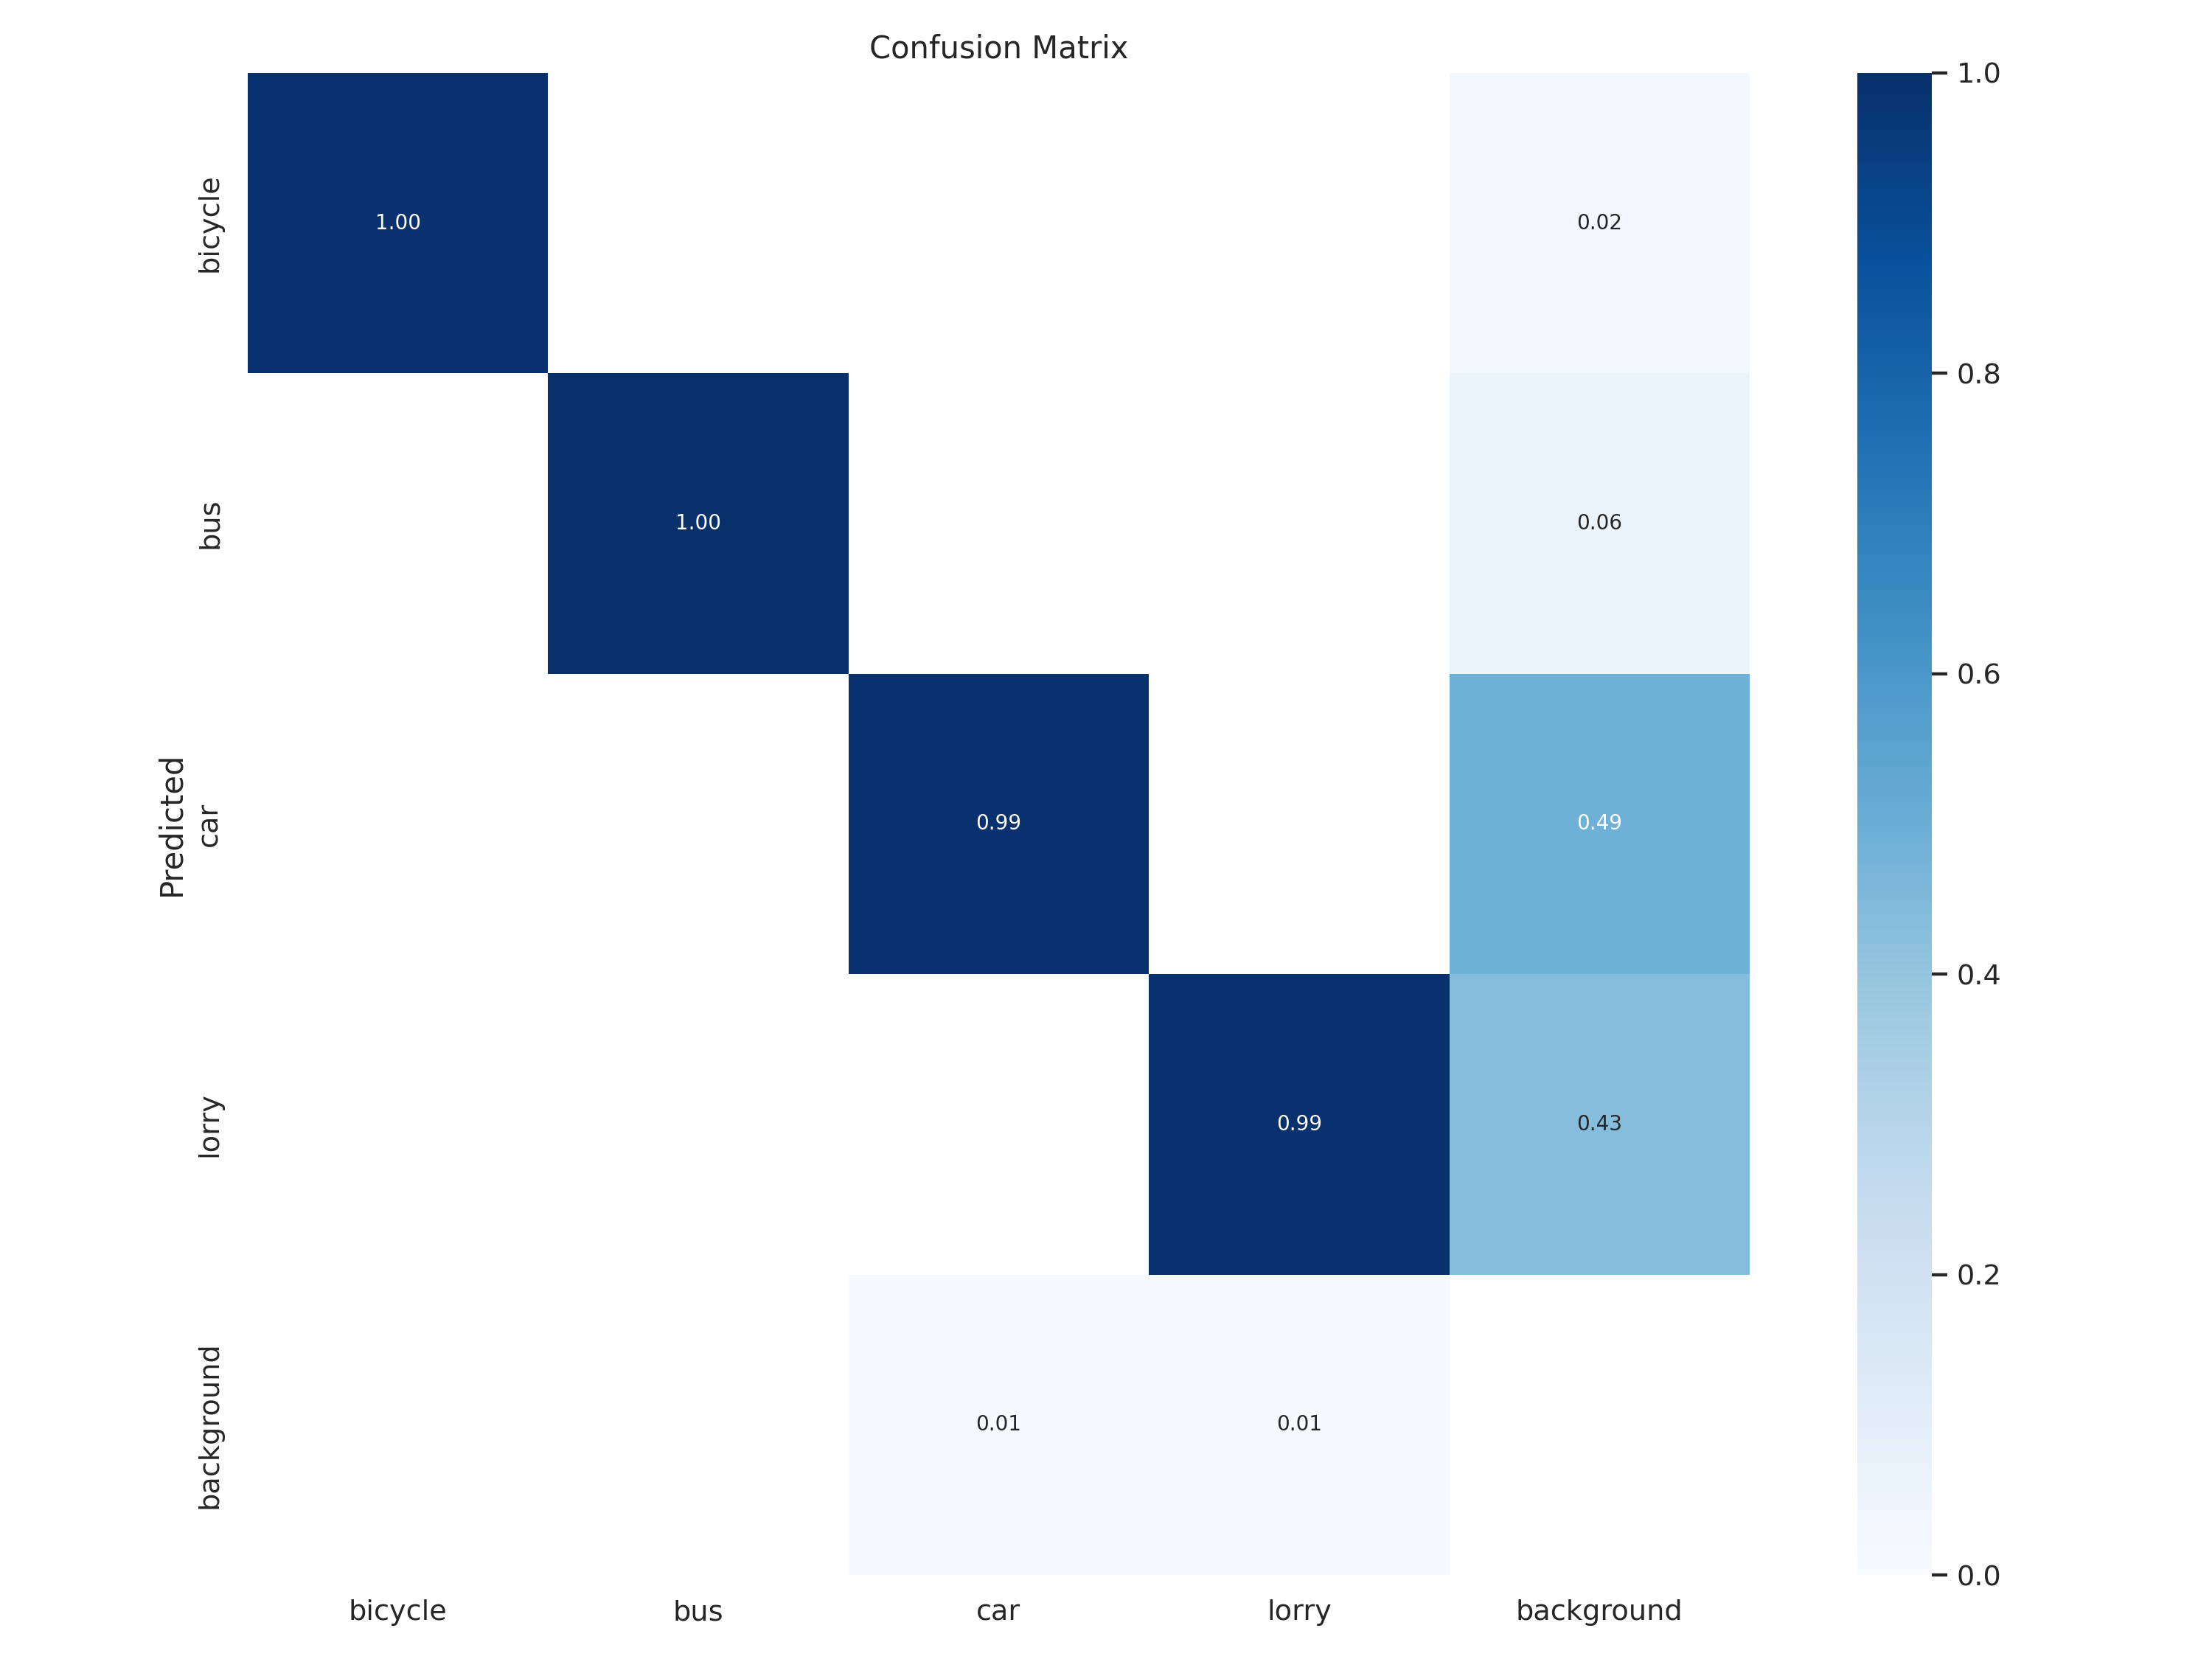

In [ ]:
Image(filename = '/content/vehicle-overspeeding-detection-flaskapp/runs/segment/train/confusion_matrix.png',width =1200)

#**Printing the Model Prediction on Validation Batch**

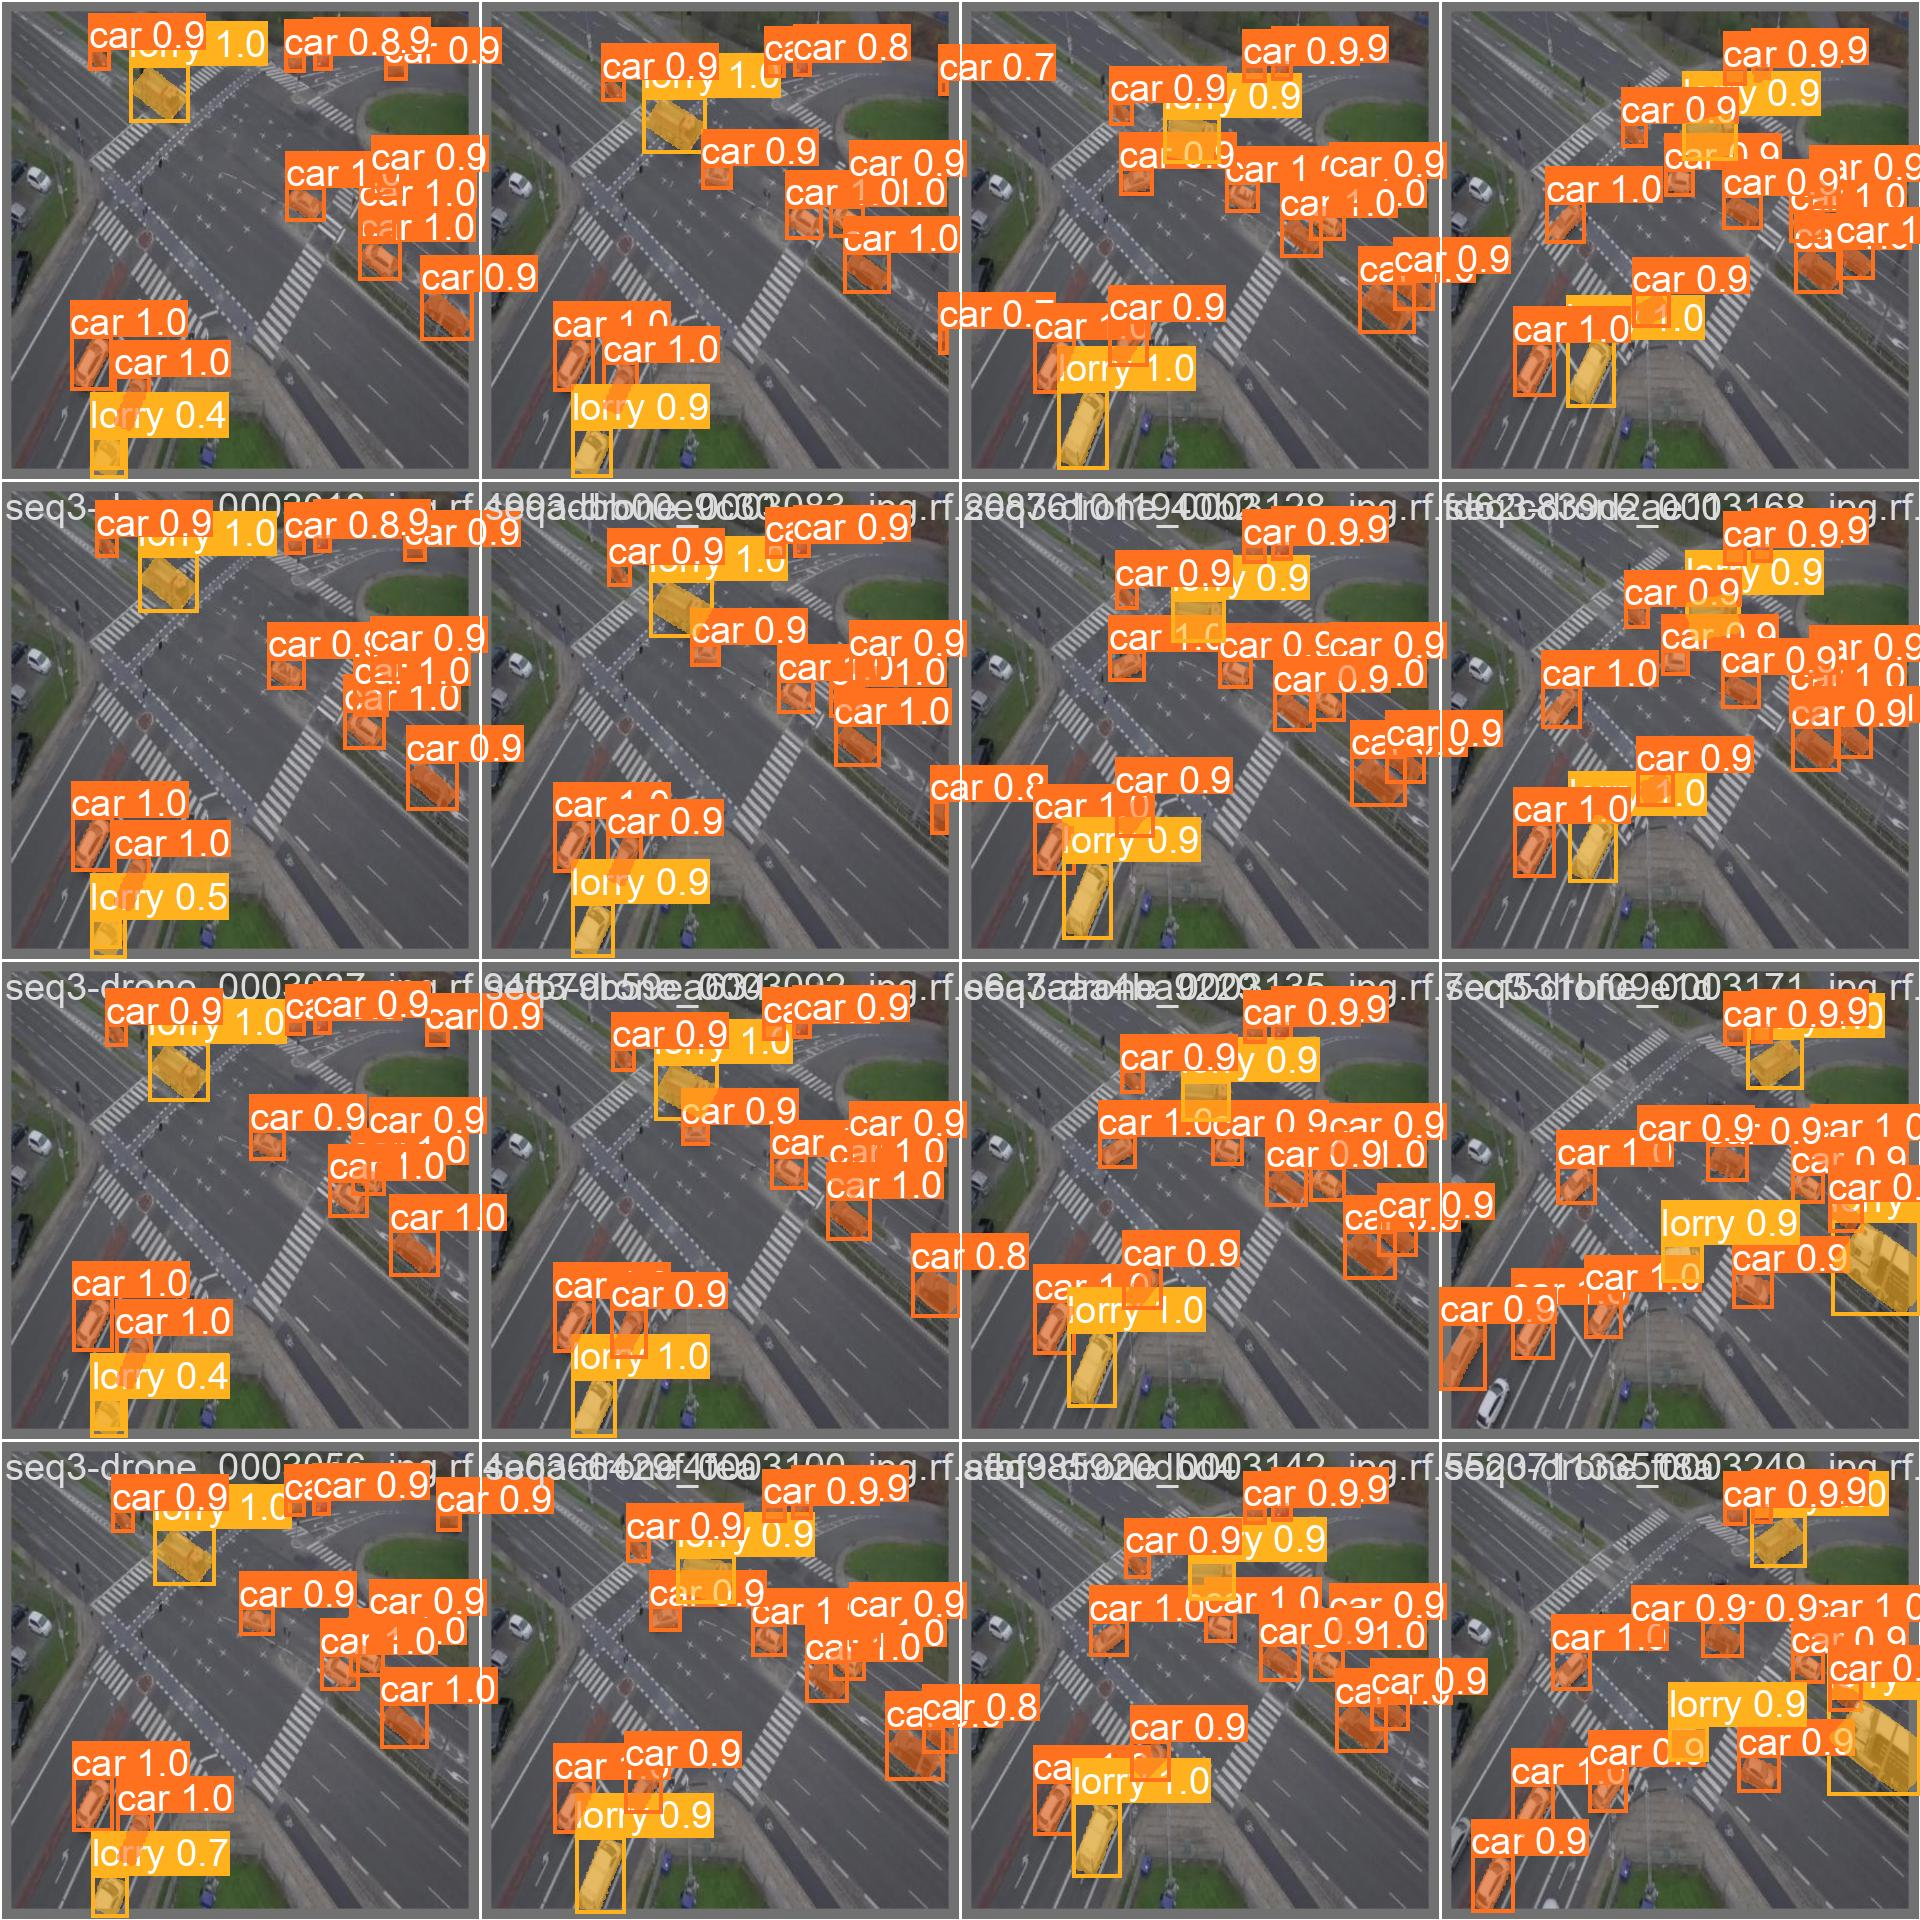

In [ ]:
Image(filename = r'/content/vehicle-overspeeding-detection-flaskapp/runs/segment/train/val_batch2_pred.jpg', width =900)

#**Downloading the Weights From the Google Drive**"


In [ ]:
%cd {HOME}

/content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment


In [ ]:
!gdown "https://drive.google.com/uc?id=1N6lXKKaPpUEUOnpxIj03fjQRSSxmsSKf&confirm=t"


Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1N6lXKKaPpUEUOnpxIj03fjQRSSxmsSKf&confirm=t

but Gdown can't. Please check connections and permissions.


#**Validate Custom Model**

In [ ]:
%cd /content/vehicle-overspeeding-detection-flaskapp/ultralytics/yolo/v8/segment

/content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment


In [ ]:
!pwd

/content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment


In [ ]:
 {dataset.location}

{'/content/Drone-Traffic-1'}

In [ ]:
!python val.py model='/content/vehicle-overspeeding-detection-flaskapp/runs/segment/train/weights/best.pt' data={dataset.location}/data.yaml

2024-05-31 13:36:04.937807: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 13:36:04.937857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 13:36:04.939112: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-31 13:36:04.945954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 13:36:06.110550: W tensorflow/compiler/tf2

#**Inference with Custom Model**

#**Demo Video 1**

In [ ]:
!gdown "https://drive.google.com/uc?id=1UUZUS76ylH5RjMSc9s4rITSYDTG5AHt0&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1UUZUS76ylH5RjMSc9s4rITSYDTG5AHt0&confirm=t
To: /content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment/test4.mp4
100% 7.96M/7.96M [00:00<00:00, 26.5MB/s]


In [ ]:
# Uninstall the current version of numpy
!pip uninstall -y numpy

# Install numpy version 1.23.5
!pip install numpy==1.23.5

# Verify the installation
import numpy as np
print(np.__version__)


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


1.23.5


In [ ]:
!python predict.py model='/content/vehicle-overspeeding-detection-flaskapp/runs/segment/train/weights/best.pt' source='test4.mp4'

[2024-05-31 13:43:39,688][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
2024-05-31 13:43:40.042245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 13:43:40.042294: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 13:43:40.043619: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-31 13:43:40.050557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, 

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/vehicle-overspeeding-detection-flaskapp/runs/detect/train/test4.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Demo Video 2**

In [ ]:
!gdown "https://drive.google.com/uc?id=1MaH6dNoegFjwkhtedxXufn2UD7EPpF_w&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1MaH6dNoegFjwkhtedxXufn2UD7EPpF_w&confirm=t
To: /content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment/test2.mp4
100% 3.79M/3.79M [00:00<00:00, 259MB/s]


In [ ]:
!python predict.py model='best.pt' source='test2.mp4'

[2023-01-25 11:08:54,325][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
Ultralytics YOLOv8.0.3 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8l-seg summary: 295 layers, 45914972 parameters, 0 gradients, 220.1 GFLOPs
video 1/1 (1/319) /content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment/test2.mp4: 384x640 17 cars, 12 lorrys, 49.9ms
video 1/1 (2/319) /content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment/test2.mp4: 384x640 17 cars, 12 lorrys, 32.9ms
video 1/1 (3/319) /content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment/test2.mp4: 384x640 15 cars, 12 lorrys, 32.4ms
video 1/1 (4/319) /content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment/test2.mp4: 384x640 15 cars, 12 lorrys, 32.5ms
video 1/1 (5/319) /content/YOLOv8_Segmentation_DeepSORT_Object_Tracking/ultralytics/yolo/v8/segment/te

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/vehicle-overspeeding-detection-flaskapp/runs/detect/train2/test2.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
import shutil

# Path to the folder you want to zip
folder_path = '/content/vehicle-overspeeding-detection-flaskapp/runs/segment/train'

# Path to save the zipped file
output_filename = '/content/result_trained.zip'

# Zip the folder
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)


'/content/result_trained.zip'